<a href="https://colab.research.google.com/github/anapowarchuk/processamento-de-sinais/blob/main/prova_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Prova Prática** - Ana Powarchuk Xavier

Sejam os sinais discretos h[n] e x[n] abaixo:

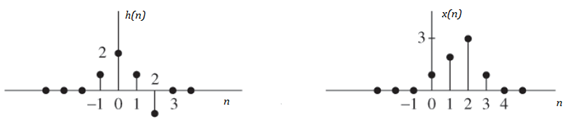

Importando Bibliotecas

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as tck
from scipy import fftpack
from scipy import signal
from scipy.fft import fft, fftfreq, ifft
import warnings
warnings.filterwarnings('ignore')


Plotagem dos sinais

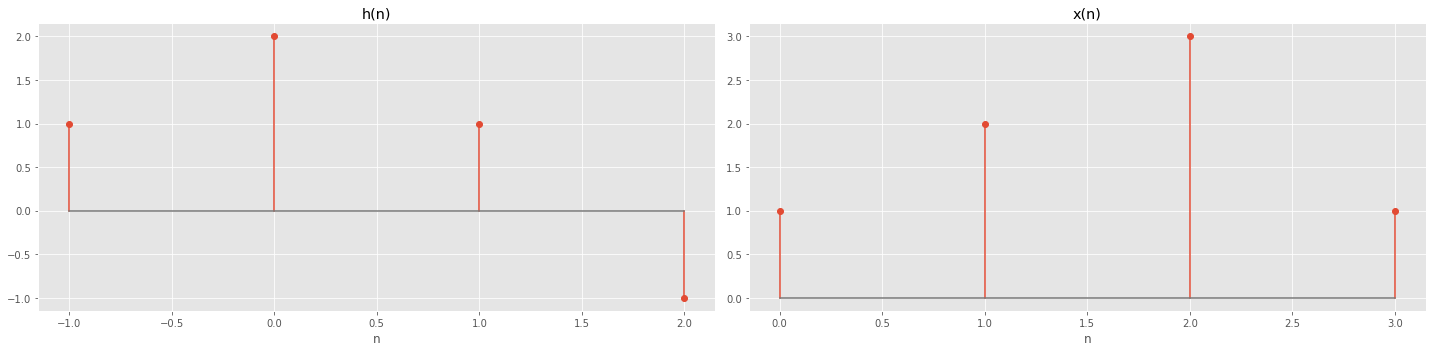

In [ ]:
h_n = [1,2,1,-1]
indices_h = [-1,0,1,2]

x_n = [1,2,3,1]
indices_x = [0,1,2,3]

plt.rcParams['figure.figsize'] = (20,5)

plt.subplot(1,2,1)
plt.title("h(n)")
plt.xlabel("n")
plt.stem(indices_h, h_n)

plt.subplot(1,2,2)
plt.title("x(n)")
plt.xlabel("n")
plt.stem(indices_x, x_n)

plt.tight_layout()
plt.show()

### **QUESTÃO A**

Cálculo da convolução entre h(n) e x(n-2) e plotagem do resultado. 

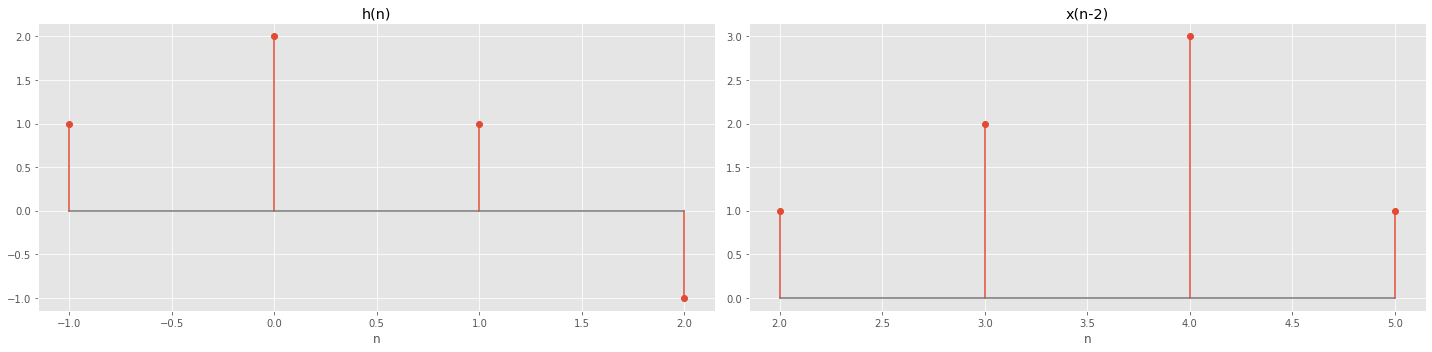

In [ ]:
# Deslocamento do sinal h em 2 unidades para direita: h(n-2)
for i in range(len(indices_x)): 
  indices_x[i] = indices_x[i]+2

plt.rcParams['figure.figsize'] = (20,5)

plt.subplot(1,2,1)
plt.title("h(n)")
plt.xlabel("n")
plt.stem(indices_h, h_n)

plt.subplot(1,2,2)
plt.title("x(n-2)")
plt.xlabel("n")
plt.stem(indices_x, x_n)

plt.tight_layout()
plt.show()

In [ ]:
# Função da Convolução
def convolucao(sinal1, sinal2):
    resultado = []
    tam_resultado = len(sinal1) + len(sinal2) - 1 

    for result_indice in range(tam_resultado):
        soma = 0
        for indice1 in range(len(sinal1)):
            if (result_indice - indice1 >= 0) and (len(sinal2) > result_indice - indice1):
                soma += sinal1[indice1] * sinal2[result_indice - indice1] 
        resultado.append(soma)
    return resultado

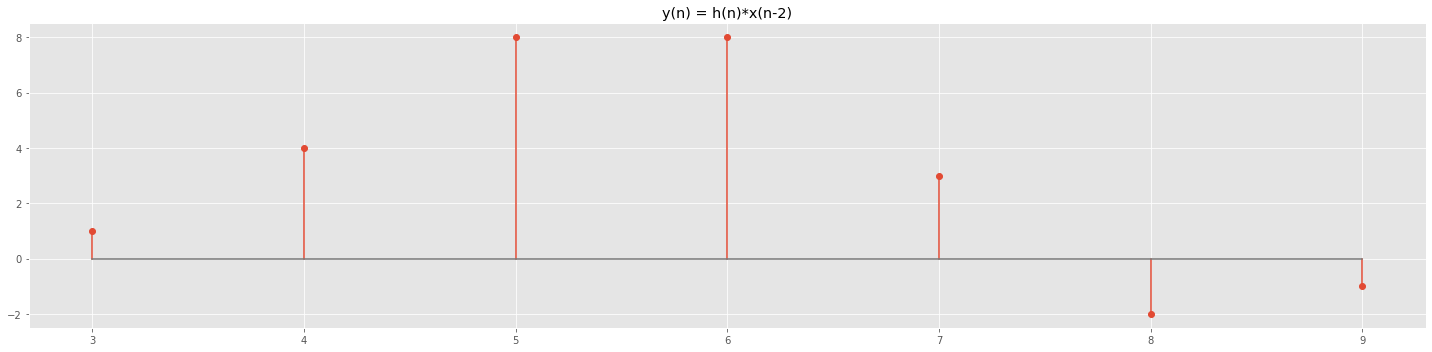

In [ ]:
# Menor indice para incio do grafico
if (indices_h[0] > indices_x[0]):
  inicio = (indices_h[0] - indices_x[0])
else:
  inicio = (indices_x[0] - indices_h[0])

# Chamando a função convolucao
convolucao = convolucao(h_n, x_n)
indices_convolucao = list(range(inicio, len(convolucao)+(inicio)))


# Plotagem da convolução
plt.figure(figsize=(20, 5))

plt.stem(indices_convolucao, convolucao)
plt.title("y(n) = h(n)*x(n-2)")

plt.tight_layout()
plt.show()

### **QUESTÃO B**

Cálculo da transformada discreta de Fourier (TDF) do resultado da convolução entre h(n) e x(n-2). Valor DC deste sinal e definição do valor DC.

In [ ]:
y_n_tdf = np.abs(fftpack.fft(convolucao))

print(y_n_tdf[0]," é o valor DC da convolução entre h(n) e x(n-2). ")

21.0  é o valor DC da convolução entre h(n) e x(n-2). 


DC é o valor médio do sinal e o primeiro valor do espectro de frequência.



### **QUESTÃO C**

Plotagem dos gráficos de (amplitude x frequência) e (fase x frequência) do sinal com os dados calculados a partir da letra b. Supondo, para isso, que a taxa de amostragem dos sinais seja de 100 Hz.

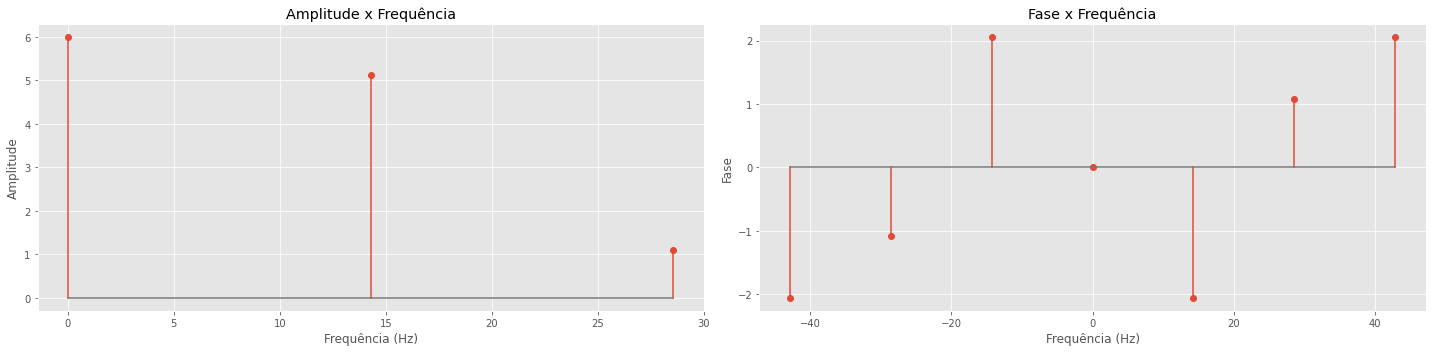

In [ ]:
ts = 1/100
n = len(y_n_tdf)
frequencia = fftfreq(n, ts)
amplitude = np.abs(y_n_tdf)[:n//2]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.stem(frequencia[:N//2], 2.0/N * amplitude)
plt.title('Amplitude x Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')


plt.subplot(1,2,2)
plt.stem(y_n_frequencia, fase)
plt.title("Fase x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase")

plt.tight_layout()
plt.show()